# The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report 

In [2]:
# Import the file
sales=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:

sales.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data information

In [4]:
sales.shape

(200, 5)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
sales.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
sales.describe()
# Large amount of money is spent on TV advertising

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# Checking for null values
sales.isnull().sum()
# No null values as such in the dataset

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

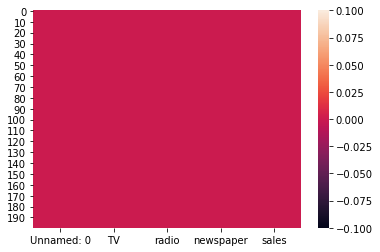

In [9]:
sns.heatmap(sales.isnull())

In [10]:
# Delete the Unnamed column
sales.drop(['Unnamed: 0'],axis=1,inplace=True)
sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Finding the correlation between features

In [11]:

sales.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


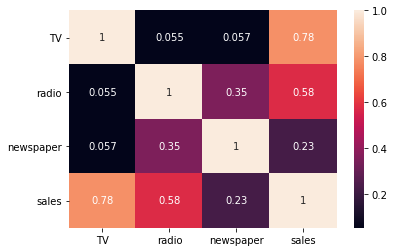

In [12]:
sns.heatmap(sales.corr(),annot=True)
plt.show()
# its clearly visible that TV is having highly correlation with sales

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


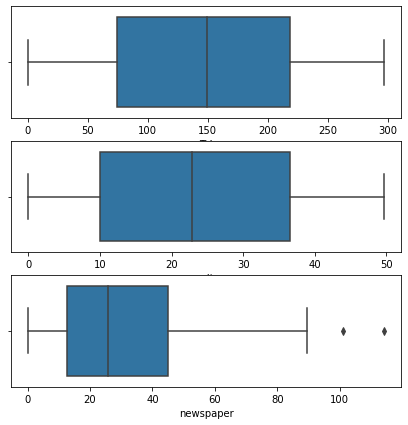

In [13]:
# Analyse if any outliers are there in the data or not

figure,axs=plt.subplots(3,figsize=(7,7))
plt1=sns.boxplot(sales['TV'],ax=axs[0])
plt2=sns.boxplot(sales['radio'],ax=axs[1])
plt3=sns.boxplot(sales['newspaper'],ax=axs[2])
plt.show()

# No such outliers are present in the dataset which needs to be considered


# Explanatory Data Analysis through visualization which will show the relation of Sales with 
# other variables using scatter plot

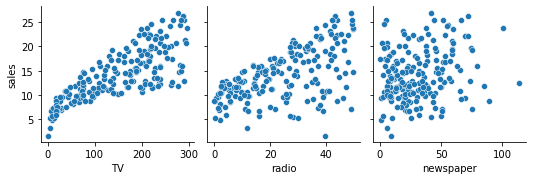

In [14]:
sns.pairplot(sales,x_vars=['TV','radio','newspaper'],y_vars='sales',kind='scatter')
plt.show()

<Figure size 864x720 with 0 Axes>

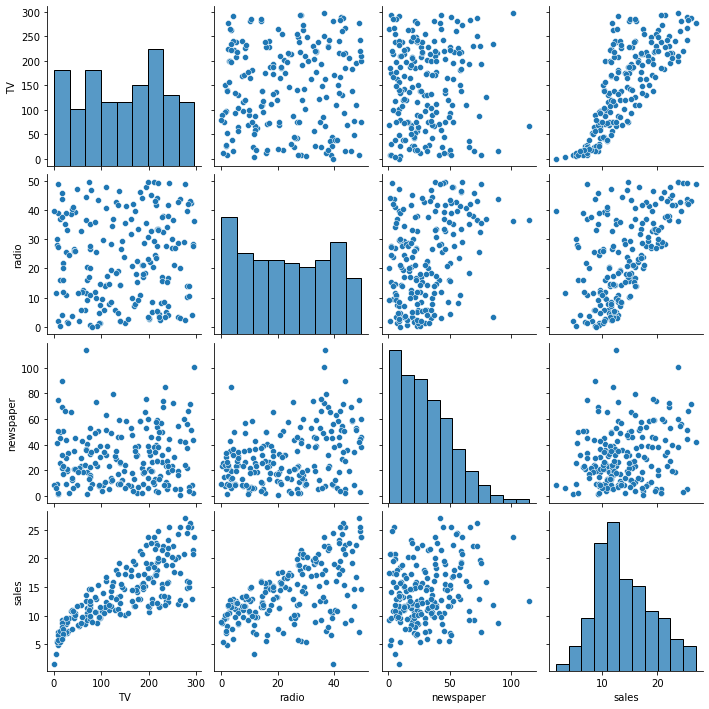

In [15]:
# Plotting  pairwise to visualize the relationship  among the features in  the dataset

plt.figure(figsize=(12,10))

sns.pairplot(sales)
plt.show()

In [16]:
# From the pairplot and heatmap its clearly visible that the variable TV seems to be most correlated with Sales
# Hence  we can first go with linear regression

# Model Building


In [17]:
# We have to assing TV as X variable(independent) and sales as Y variable(dependent)
x=sales['TV']
y=sales['sales']


In [18]:
# has to reshape the x variable as getting data in 1D array
x=np.array(x)
x=x.reshape(-1,1)

# Splitting the data into training and testing set

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
print('X-train shape:',x_train.shape)
print('Y-train shape:',y_train.shape)
print('X-test shape:',x_test.shape)
print('Y-test shape:',y_test.shape)

X-train shape: (140, 1)
Y-train shape: (140,)
X-test shape: (60, 1)
Y-test shape: (60,)


# Linear Regression Model

In [21]:
lm=LinearRegression()

In [22]:
lm.fit(x,y)


LinearRegression()

In [23]:
print('Linear Coefficients:',lm.coef_)
print('Linear intercept:',lm.intercept_)




Linear Coefficients: [0.04753664]
Linear intercept: 7.0325935491276965


In [24]:
# Model Prediction
y_pred=lm.predict(x_test)
y_pred

array([14.79532693, 16.32125309, 20.95607553,  7.58877224, 17.50491544,
       10.60259525, 17.3385372 ,  9.40942557, 17.60474238, 15.35625929,
        8.52999772,  9.70415274, 18.17993573,  7.28929141, 13.66395489,
       15.12332975,  7.37961102, 16.4258337 , 10.61210257, 18.31779199,
       17.94225253, 10.25557777,  8.83898589, 18.95953663, 10.31262174,
        9.57580381, 17.18166628, 13.65444756, 11.17778859,  7.43190133,
       16.53041431, 10.32212907, 16.48763133,  7.83596277, 20.37612852,
       18.3558213 ,  9.32861328, 20.04337204, 12.60388781,  8.33985116,
       12.54684384, 15.44657891,  9.08142275,  9.99412625, 17.68080101,
        8.84849321, 10.38868036, 14.03474068, 12.00492614, 10.65963921,
       10.74995883, 15.0377638 ,  7.44616232,  7.40337934, 10.66439288,
       13.18383482, 10.52178296, 20.80395828,  7.9643117 , 16.4258337 ])

In [25]:
# RMSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

8.911342352546482


In [26]:
# R-squared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6736322951877849

In [27]:
# Cross validating 
from sklearn.model_selection import cross_val_predict
scores=cross_val_predict(lm,sales,y,cv=6)
print ('Cross validate score:',scores)

Cross validate score: [22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6  8.6 17.4  9.2  9.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9
 18.9 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6
 21.7 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5
 25.4 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8
 14.1 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6
  6.6  8.8 24.7  9.7  1.6 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.6 10.3 17.3 15.9  6.7 10.8  9.9  5.9 

<function matplotlib.pyplot.show(close=None, block=None)>

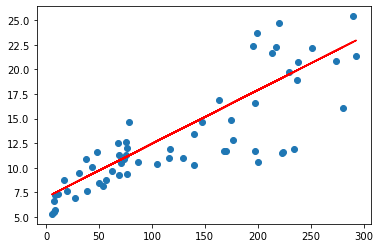

In [28]:
# To see the fit on the Training Data

plt.scatter(x_test,y_test)
plt.plot(x_test,6.9847+0.0545*x_test,'r')
plt.show

# Multiple linear Regression



In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Dividing features in x and y
x=sales[['TV','radio','newspaper']]  # independent variables
y=sales['sales']      # Dependent variable

In [31]:
lm1=LinearRegression()
lm1.fit(x,y)

LinearRegression()

In [32]:
print('Linear Coefficients:',lm1.coef_)
print('Linear intercept:',lm1.intercept_)

Linear Coefficients: [ 0.04576465  0.18853002 -0.00103749]
Linear intercept: 2.9388893694594085


In [33]:
# Model Prediction
y_pred1=lm1.predict(x[['TV','radio','newspaper']])
y_pred1

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [34]:
# RMSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y, y_pred1))

2.7841263145109365


In [35]:
# R-squared
from sklearn.metrics import r2_score
r2_score(y, y_pred1)

0.8972106381789521

In [36]:
# this clearly implies Multiple Linear Regression is giving more accuray than linear Regression

In [37]:
# Multiple Linear Regression without considering newspaper feature

In [38]:
# Dividing features in x and y by not considering newspaper
x=sales[['TV','radio']]  # independent variables
y=sales['sales']      # Dependent variable

In [39]:
lm2=LinearRegression()
lm2.fit(x,y)

LinearRegression()

In [40]:
print('Linear Coefficients:',lm2.coef_)
print('Linear intercept:',lm2.intercept_)

Linear Coefficients: [0.04575482 0.18799423]
Linear intercept: 2.921099912405138


In [41]:
# Model Prediction
y_pred2=lm2.predict(x[['TV','radio']])
y_pred2

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [42]:
# RMSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y, y_pred2))

2.784569900338091


In [43]:
# R-squared
from sklearn.metrics import r2_score
r2_score(y, y_pred2) # Not much effect on the score is observed by not considering newspaper feature

0.8971942610828957

# Cross validating 

In [44]:

from sklearn.model_selection import cross_val_predict
scores=cross_val_predict(lm1,sales,y,cv=6)
print ('Cross validate score:',scores)

Cross validate score: [22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6  8.6 17.4  9.2  9.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9
 18.9 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6
 21.7 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5
 25.4 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8
 14.1 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6
  6.6  8.8 24.7  9.7  1.6 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.6 10.3 17.3 15.9  6.7 10.8  9.9  5.9 

In [45]:
# Cross validation is giving almost 100% accuracy, may be some variation for real and predicted value.


# Hence multiple linear regression works better in case of this Dataset when we compare the RMSE for both

In [46]:
import pickle

In [47]:
filename= 'Advertising Sales Prediction'
pickle.dump(lm1, open(filename,'wb'))